In [44]:
import scanpy as sc

import muon as mu

from muon import atac as ac
from muon import prot as pt

import scipy
import numpy as np 
import pandas as pd
 
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd

In [5]:
#Reading the Annotated Data (Core and Peri)

Core1 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT01/Core/BTROHT01_5_core_rna_ANNOTATED_FINAL.h5ad')

Peri1 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT01/Perimarginal/BTROHT01_5_peri_rna_ANNOTATED_FINAL.h5ad')

Core2 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT02/Core/BTROHT02_5_core_rna_ANNOTATED_FINAL.h5ad')

Peri2 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT02/Perimarginal/BTROHT02_5_peri_rna_ANNOTATED_FINAL.h5ad')

Core3 = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT03/Core/BTROHT03_core_rna_muon.h5ad")

Peri3 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT03/Perimarginal/BTROHT03_peri_rna_muon.h5ad')

Core4 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT04/Core/BTROHT04_5_core_rna_ANNOTATED_FINAL.h5ad')

Peri4 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT04/Perimarginal/BTROHT04_5_peri_rna_ANNOTATED_FINAL.h5ad')

Core6 = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT06/Core/BTROHT06_core_rna_muon.h5ad") 

Peri6 = sc.read('/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT06/Perimarginal/BTROHT06_peri_rna_muon.h5ad')


In [6]:
def rename_barcodes(adata, suffix):
    adata = adata.copy()
    adata.obs_names = adata.obs_names + f"_{suffix}"
    return adata


In [7]:
# Peri samples
Peri1 = rename_barcodes(Peri1, "BTROHT01_Peri")
Peri2 = rename_barcodes(Peri2, "BTROHT02_Peri")
Peri3 = rename_barcodes(Peri3, "BTROHT03_Peri")
Peri4 = rename_barcodes(Peri4, "BTROHT04_Peri")
Peri6 = rename_barcodes(Peri6, "BTROHT06_Peri")

# Core samples
Core1 = rename_barcodes(Core1, "BTROHT01_Core")
Core2 = rename_barcodes(Core2, "BTROHT02_Core")
Core3 = rename_barcodes(Core3, "BTROHT03_Core")
Core4 = rename_barcodes(Core4, "BTROHT04_Core")
Core6 = rename_barcodes(Core6, "BTROHT06_Core")


In [ ]:
import anndata as ad

ann_data = ad.concat(
    [
        Peri6, Peri1, Peri2, Peri3, Peri4,
        Core4, Core1, Core2, Core3, Core6
    ],
    label="source",  # adds a column 'source' indicating the origin
    keys=[
        "Peri6", "Peri1", "Peri2", "Peri3", "Peri4",
        "Core4", "Core1", "Core2", "Core3", "Core6"
    ],
    index_unique=None  # keeps barcodes clean, without extra -0-0-0
)


In [9]:
!pwd

/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation


In [193]:

ann_data.obs.index

Index(['AAACAGCCACCCTCAC-1_BTROHT06_Peri', 'AAACATGCATTAGGCC-1_BTROHT06_Peri',
       'AAACCGAAGGCCGGAA-1_BTROHT06_Peri', 'AAACCGCGTCTATCGT-1_BTROHT06_Peri',
       'AAACCGCGTTACCGGG-1_BTROHT06_Peri', 'AAACCGGCACAGGGAC-1_BTROHT06_Peri',
       'AAACGCGCATTAAACC-1_BTROHT06_Peri', 'AAACGGATCCCTCAGT-1_BTROHT06_Peri',
       'AAACGTACACAGGATG-1_BTROHT06_Peri', 'AAACGTACAGGCATGA-1_BTROHT06_Peri',
       ...
       'TTTGTCCCAGCCAGTT-1_BTROHT06_Core', 'TTTGTCCCATAAGTTC-1_BTROHT06_Core',
       'TTTGTCTAGAGAGCCG-1_BTROHT06_Core', 'TTTGTCTAGGAACCGG-1_BTROHT06_Core',
       'TTTGTGAAGAGGCTAA-1_BTROHT06_Core', 'TTTGTGAAGCTAGAAG-1_BTROHT06_Core',
       'TTTGTGGCAACTAGGG-1_BTROHT06_Core', 'TTTGTGTTCCAATTAG-1_BTROHT06_Core',
       'TTTGTTGGTAATGACT-1_BTROHT06_Core', 'TTTGTTGGTTCATCTA-1_BTROHT06_Core'],
      dtype='object', length=32313)

In [175]:
ann_data

AnnData object with n_obs × n_vars = 32313 × 36588
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_labels', 'majority_voting', 'conf_score', 'over_clustering', 'cnv_raw_l1', 'cnv_raw_l2', 'cnv_score', 'cnv_leiden', 'celltype', 'source'
    obsm: 'X_pca', 'X_umap'

In [9]:
ann_data.write("/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation/10Samples_agg_annotated.h5ad")

In [178]:
ann_data.obs["celltype"].value_counts()

celltype
Oligodendrocytes                  7370
Tumor cells                       5503
mOli                              4312
Brain neurons                     4151
Tumor Cells                       2876
Immune Cells                      2543
Microglia                         2375
Neurons                            895
InN                                493
Astrocytes                         271
Oligodendrocyte precursor cell     249
L2/3, L2/4                         178
OPC or Endo                        156
T cells                            156
OPCs                               154
L6                                 134
L3/5                               115
IN-SST                             115
IN-PVALB                           109
IN-VIP                              56
IN-LAMP5                            51
L5/6                                36
Macroglia                           10
Name: count, dtype: int64

In [10]:
ann_data.obs.index

Index(['AAACAGCCACCCTCAC-1_BTROHT06_Peri', 'AAACATGCATTAGGCC-1_BTROHT06_Peri',
       'AAACCGAAGGCCGGAA-1_BTROHT06_Peri', 'AAACCGCGTCTATCGT-1_BTROHT06_Peri',
       'AAACCGCGTTACCGGG-1_BTROHT06_Peri', 'AAACCGGCACAGGGAC-1_BTROHT06_Peri',
       'AAACGCGCATTAAACC-1_BTROHT06_Peri', 'AAACGGATCCCTCAGT-1_BTROHT06_Peri',
       'AAACGTACACAGGATG-1_BTROHT06_Peri', 'AAACGTACAGGCATGA-1_BTROHT06_Peri',
       ...
       'TTTGTCCCAGCCAGTT-1_BTROHT06_Core', 'TTTGTCCCATAAGTTC-1_BTROHT06_Core',
       'TTTGTCTAGAGAGCCG-1_BTROHT06_Core', 'TTTGTCTAGGAACCGG-1_BTROHT06_Core',
       'TTTGTGAAGAGGCTAA-1_BTROHT06_Core', 'TTTGTGAAGCTAGAAG-1_BTROHT06_Core',
       'TTTGTGGCAACTAGGG-1_BTROHT06_Core', 'TTTGTGTTCCAATTAG-1_BTROHT06_Core',
       'TTTGTTGGTAATGACT-1_BTROHT06_Core', 'TTTGTTGGTTCATCTA-1_BTROHT06_Core'],
      dtype='object', length=32313)

In [11]:
#Reading the Raw Data 

core1_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT01/Core/BTROHT01_2_core_rna_raw.h5ad")

peri1_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT01/Perimarginal/BTROHT01_2_peri_raw_rna.h5ad")

core2_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT02/Core/BTROHT02_2_core_raw_rna.h5ad")

peri2_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT02/Perimarginal/BTROHT02_2_peri_raw_rna.h5ad")

core3_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT03/Core/BTROHT03_core_raw_rna.h5ad")

peri3_raw = sc.read(("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT03/Perimarginal/BTROHT03_2_peri_rna_raw.h5ad"))

core4_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT04/Core/BTROHT04_2_core_raw_rna.h5ad")

peri4_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT04/Perimarginal/BTROHT04_2_peri_raw_rna.h5ad")

core6_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT06/Core/BTROHT06_core_raw_rna.h5ad")

peri6_raw = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/BTROHT06/Perimarginal/BTROHT06_2_peri_rna_raw.h5ad")


In [ ]:
# add label to barcodes

In [12]:
# Core samples
core1_raw = rename_barcodes(core1_raw, "BTROHT01_Core")
core2_raw = rename_barcodes(core2_raw, "BTROHT02_Core")
core3_raw = rename_barcodes(core3_raw, "BTROHT03_Core")
core4_raw = rename_barcodes(core4_raw, "BTROHT04_Core")
core6_raw = rename_barcodes(core6_raw, "BTROHT06_Core")

# Peri samples
peri1_raw = rename_barcodes(peri1_raw, "BTROHT01_Peri")
peri2_raw = rename_barcodes(peri2_raw, "BTROHT02_Peri")
peri3_raw = rename_barcodes(peri3_raw, "BTROHT03_Peri")
peri4_raw = rename_barcodes(peri4_raw, "BTROHT04_Peri")
peri6_raw = rename_barcodes(peri6_raw, "BTROHT06_Peri")


In [ ]:
# add site, patient, patientzone

In [13]:
# لیست نمونه‌ها با اطلاعات مربوطه
sample_info = {
    "core1_raw": ("Core", "BTROHT01", "BTROHT01_Core"),
    "core2_raw": ("Core", "BTROHT02", "BTROHT02_Core"),
    "core3_raw": ("Core", "BTROHT03", "BTROHT03_Core"),
    "core4_raw": ("Core", "BTROHT04", "BTROHT04_Core"),
    "core6_raw": ("Core", "BTROHT06", "BTROHT06_Core"),
    # اگر Peri هم داری اینجا اضافه کن
    # "peri1_raw": ("Peri", "BTROHT01", "Peri1"),
}

# اعمال اطلاعات به همه نمونه‌ها
for var_name, (site, patient, zone) in sample_info.items():
    data = globals()[var_name]
    data.obs["site"] = site
    data.obs["patient"] = patient
    data.obs["patientzone"] = f"{zone}"


In [24]:
# لیست نمونه‌ها با اطلاعات مربوطه
sample_info = {
    "peri1_raw": ("Peri", "BTROHT01", "BTROHT01_Peri"),
    "peri2_raw": ("Peri", "BTROHT02", "BTROHT02_Peri"),
    "peri3_raw": ("Peri", "BTROHT03", "BTROHT03_Peri"),
    "peri4_raw": ("Peri", "BTROHT04", "BTROHT04_Peri"),
    "peri6_raw": ("Peri", "BTROHT06", "BTROHT06_Peri"),
    # اگر Peri هم داری اینجا اضافه کن
    # "peri1_raw": ("Peri", "BTROHT01", "Peri1"),
}

# اعمال اطلاعات به همه نمونه‌ها
for var_name, (site, patient, zone) in sample_info.items():
    data = globals()[var_name]
    data.obs["site"] = site
    data.obs["patient"] = patient
    data.obs["patientzone"] = f"{zone}"


In [23]:
core1_raw

AnnData object with n_obs × n_vars = 518 × 36601
    obs: 'site', 'patient', 'patientzone'
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [197]:
peri6_raw.obs.index

Index(['AAACAGCCACCCTCAC-1_BTROHT06_Peri', 'AAACATGCATTAGGCC-1_BTROHT06_Peri',
       'AAACCGAAGGCCGGAA-1_BTROHT06_Peri', 'AAACCGAAGTCTTGAA-1_BTROHT06_Peri',
       'AAACCGCGTCTATCGT-1_BTROHT06_Peri', 'AAACCGCGTTACCGGG-1_BTROHT06_Peri',
       'AAACCGGCACAGGGAC-1_BTROHT06_Peri', 'AAACGCGCATTAAACC-1_BTROHT06_Peri',
       'AAACGGATCCCTCAGT-1_BTROHT06_Peri', 'AAACGTACACAGGATG-1_BTROHT06_Peri',
       ...
       'TTTGCGGAGGCAAGTA-1_BTROHT06_Peri', 'TTTGCGGAGTGCTGTG-1_BTROHT06_Peri',
       'TTTGGCTGTAATCGTG-1_BTROHT06_Peri', 'TTTGGCTGTAGGATCC-1_BTROHT06_Peri',
       'TTTGTGAAGTCAGTAC-1_BTROHT06_Peri', 'TTTGTGAAGTTAGACC-1_BTROHT06_Peri',
       'TTTGTGTTCCCTCGCA-1_BTROHT06_Peri', 'TTTGTGTTCGCTCACT-1_BTROHT06_Peri',
       'TTTGTGTTCTCACACC-1_BTROHT06_Peri', 'TTTGTTGGTATTTGGG-1_BTROHT06_Peri'],
      dtype='object', length=2458)

# Concatenation all data raw (10 samples)

In [25]:
import anndata as ad

all_data = ad.concat(
    [
        peri6_raw, peri1_raw, peri2_raw, peri3_raw, peri4_raw,
        core4_raw, core1_raw, core2_raw, core3_raw, core6_raw
    ],
    label="source",  # نام ستون که نشان می‌دهد هر نمونه از کجا آمده
    keys=[
        "peri6", "peri1", "peri2", "peri3", "peri4",
        "core4", "core1", "core2", "core3", "core6"
    ],
    index_unique=None,  # با این می‌تونی کنترل کنی چه چیزی به index اضافه بشه
)


In [26]:
all_data

AnnData object with n_obs × n_vars = 37260 × 36601
    obs: 'site', 'patient', 'patientzone', 'source'

In [199]:
all_data.obs.index

Index(['AAACAGCCACCCTCAC-1_BTROHT06_Peri', 'AAACATGCATTAGGCC-1_BTROHT06_Peri',
       'AAACCGAAGGCCGGAA-1_BTROHT06_Peri', 'AAACCGAAGTCTTGAA-1_BTROHT06_Peri',
       'AAACCGCGTCTATCGT-1_BTROHT06_Peri', 'AAACCGCGTTACCGGG-1_BTROHT06_Peri',
       'AAACCGGCACAGGGAC-1_BTROHT06_Peri', 'AAACGCGCATTAAACC-1_BTROHT06_Peri',
       'AAACGGATCCCTCAGT-1_BTROHT06_Peri', 'AAACGTACACAGGATG-1_BTROHT06_Peri',
       ...
       'TTTGTGAAGCTAGAAG-1_BTROHT06_Core', 'TTTGTGAAGTTCCTGC-1_BTROHT06_Core',
       'TTTGTGAAGTTTCCTG-1_BTROHT06_Core', 'TTTGTGGCAACTAGGG-1_BTROHT06_Core',
       'TTTGTGTTCCAATTAG-1_BTROHT06_Core', 'TTTGTGTTCTTAGTGA-1_BTROHT06_Core',
       'TTTGTTGGTAATGACT-1_BTROHT06_Core', 'TTTGTTGGTGCGCAAT-1_BTROHT06_Core',
       'TTTGTTGGTTCATCTA-1_BTROHT06_Core', 'TTTGTTGGTTCGCTTG-1_BTROHT06_Core'],
      dtype='object', length=37260)

In [27]:
all_data.write("/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation/10Samples_agg_raw.h5ad")

In [17]:
all_data

AnnData object with n_obs × n_vars = 37260 × 36601
    obs: 'source'
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [28]:
common_indices = all_data.obs.index.intersection(ann_data.obs.index)
all_data = all_data[common_indices , :]

In [29]:
all_data

View of AnnData object with n_obs × n_vars = 32313 × 36601
    obs: 'site', 'patient', 'patientzone', 'source'

In [30]:
all_data.write("/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation/10Samples_agg_raw_filtered.h5ad")

In [31]:
all_data.obs["patientzone"].value_counts()

patientzone
BTROHT03_Peri    7166
BTROHT01_Peri    4375
BTROHT03_Core    4200
BTROHT04_Peri    4198
BTROHT02_Peri    3156
BTROHT06_Core    3141
BTROHT06_Peri    2182
BTROHT04_Core    1779
BTROHT02_Core    1652
BTROHT01_Core     464
Name: count, dtype: int64

In [22]:
#Normalization, Scaling, PCA, UMAP

In [32]:
sc.pp.normalize_total(all_data, target_sum=1e4)
sc.pp.log1p(all_data)
sc.pp.highly_variable_genes(all_data, min_mean=0.02, max_mean=4, min_disp=0.5)
all_data.raw = all_data 
sc.pp.scale(all_data, max_value=10)
sc.tl.pca(all_data, svd_solver='arpack', use_highly_variable=False)

/home/fatemeh.nasrabadi/anaconda3/envs/new_scenv/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/fatemeh.nasrabadi/anaconda3/envs/new_scenv/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


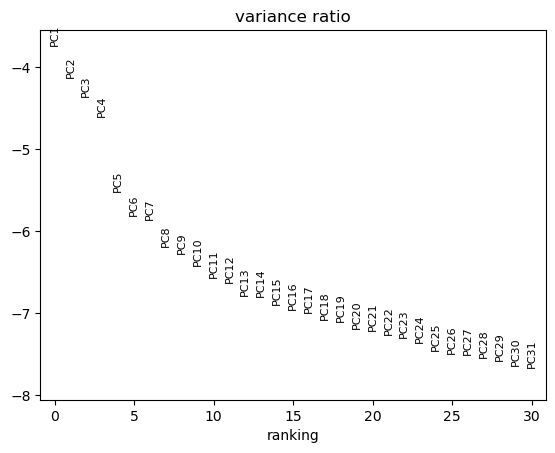

In [33]:
sc.pl.pca_variance_ratio(all_data, log=True)

In [11]:
# Step 2: Tune neighbors + PCs
sc.pp.neighbors(all_data, n_neighbors=30, n_pcs=30)  # More neighbors, fewer PCs if needed

# Step 3: Cluster (optional)
sc.tl.leiden(all_data, resolution=0.8, random_state=0)  # Tune resolution for granularity

# Step 4: UMAP – tighter clusters, more spread
sc.tl.umap(all_data, min_dist=0.3, spread=1.5, random_state=0)

In [35]:
all_data

AnnData object with n_obs × n_vars = 32313 × 36601
    obs: 'site', 'patient', 'patientzone', 'source', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [22]:
all_data.write("/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation/10Samples_agg_raw_filtered_anno_visu.h5ad")

In [7]:
all_data

AnnData object with n_obs × n_vars = 32313 × 36601
    obs: 'site', 'patient', 'patientzone', 'source', 'leiden', 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# celltypist

In [14]:
import celltypist
from celltypist import models
models.models_path= '/home/fatemeh.nasrabadi'

In [15]:
model = models.Model.load(model = 'Adult_Human_PrefrontalCortex.pkl')
predictions_adultcore = celltypist.annotate(all_data, model = 'Adult_Human_PrefrontalCortex.pkl', majority_voting = True)

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 32313 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 3652 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [16]:
all_data.obs['cell_typist_majority_voting_Adult_Human_PrefrontalCortex'] = predictions_adultcore.predicted_labels['majority_voting']
all_data.obs['cell_typist_predicted_labels_Adult_Human_PrefrontalCortex'] = predictions_adultcore.predicted_labels['predicted_labels']
all_data.obs["celltypist_conf_score_Adult_Human_PrefrontalCortex"] = predictions_adultcore.to_adata().obs.loc[
    all_data.obs.index, "conf_score"
]


In [125]:
#all_data.write("/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation/10Samples_agg_raw_filtered_anno_visu_finalann_tmp.h5ad")

In [49]:
#read the data

all_data = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation/10Samples_agg_raw_filtered_anno_visu_finalann_tmp.h5ad")

In [50]:
all_data

AnnData object with n_obs × n_vars = 32313 × 36601
    obs: 'site', 'patient', 'patientzone', 'source', 'leiden', 'celltype', 'cell_typist_majority_voting_Adult_Human_PrefrontalCortex', 'cell_typist_predicted_labels_Adult_Human_PrefrontalCortex', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'celltypist_conf_score_Adult_Human_PrefrontalCortex', 'final_celltype', 'Bigannotation'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Bigannotation_colors', 'cell_typist_majority_voting_Adult_Human_PrefrontalCortex_colors', 'celltype_colors', 'final_celltype_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'over_clustering', 'patientzone_colors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
# Create a figure with one plot
fig, ax = plt.subplots(1, 1, figsize=(35, 25))  # Adjust the figsize as needed

# Group to plot
group = 'Bigannotation'

# Plot the UMAP for the specified group with larger dot size and bigger legend
sc.pl.umap(
    all_data, 
    color=group, 
    show=False, 
    ax=ax, 
    size=50,
    legend_fontsize=30  # Increase this value to make the legend bigger
)

# Adjust layout and spacing
plt.subplots_adjust(wspace=4, hspace=3)

# Display the plot
plt.show()


# try with harmoney

In [ ]:
all_data = sc.read("/home/fatemeh.nasrabadi/ROVIGO_congas/final/gex_aggregation/10Samples_agg_raw_filtered_anno_visu_finalann_tmp.h5ad")

In [102]:
all_data

AnnData object with n_obs × n_vars = 32313 × 36601
    obs: 'site', 'patient', 'patientzone', 'source', 'leiden', 'celltype', 'cell_typist_majority_voting_Adult_Human_PrefrontalCortex', 'cell_typist_predicted_labels_Adult_Human_PrefrontalCortex', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'celltypist_conf_score_Adult_Human_PrefrontalCortex', 'final_celltype', 'Bigannotation'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Bigannotation_colors', 'cell_typist_majority_voting_Adult_Human_PrefrontalCortex_colors', 'celltype_colors', 'final_celltype_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'over_clustering', 'patientzone_colors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
#Running harmony

In [112]:
import scanpy.external as sce
sc.tl.pca(all_data, svd_solver='arpack', use_highly_variable=True)
sce.pp.harmony_integrate(all_data,"patient" ) # it was run, we dont need to run it again

2025-04-14 12:55:26,006 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Computing initial centroids with sklearn.KMeans...
2025-04-14 12:55:29,083 - harmonypy - INFO - sklearn.KMeans initialization complete.
sklearn.KMeans initialization complete.
2025-04-14 12:55:29,180 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2025-04-14 12:55:35,717 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2025-04-14 12:55:42,250 - harmonypy - INFO - Iteration 3 of 10
Iteration 3 of 10
2025-04-14 12:55:48,988 - harmonypy - INFO - Iteration 4 of 10
Iteration 4 of 10
2025-04-14 12:55:55,674 - harmonypy - INFO - Iteration 5 of 10
Iteration 5 of 10
2025-04-14 12:56:02,127 - harmonypy - INFO - Converged after 5 iterations
Converged after 5 iterations


In [113]:
# Step 2: Tune neighbors + PCs
sc.pp.neighbors(all_data, n_neighbors=30, n_pcs=30, use_rep='X_pca_harmony')  # More neighbors, fewer PCs if needed

# Step 4: UMAP – tighter clusters, more spread
sc.tl.umap(all_data, min_dist=0.3, spread=1.5, random_state=0)